# SVR (support vector regressor) continuos target

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
beer = pd.read_csv("data/beer_consumption.csv", 
                    parse_dates = ['date'],
                    dtype = {'average_temperature': np.float32,
                             'minimum_temperature': np.float32,
                             'maximum_temperature': np.float32,
                             'rainfall_mm': np.float32,
                             'weekend': np.int32,
                             'beer_consumption_liters': np.float32             
                    })

In [6]:
beer.head()

,date,average_temperature,minimum_temperature,maximum_temperature,rainfall_mm,weekend,beer_consumption_liters
0,2015-01-01,27.299999,23.9,32.500000,0.0,0,25.461000
1,2015-01-02,27.020000,24.5,33.500000,0.0,0,28.972000
2,2015-01-03,24.820000,22.4,29.900000,0.0,1,30.813999
3,2015-01-04,23.980000,21.5,28.600000,1.2,1,29.799000
4,2015-01-05,23.820000,21.0,28.299999,0.0,0,28.900000


In [13]:
X= beer.drop(columns=['date', 'beer_consumption_liters'])
y = beer[['beer_consumption_liters']]

In [24]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

# Standardize features by removing the mean and scaling to unit variance.
#  The standard score of a sample x is calculated as: z = (x - u) / s.

In [25]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

c:\Users\Marcio Rodrigues\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

# Teste 2 

In [ ]:
# get the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [79]:
# get the dataset
dataset = pd.read_csv('data/Position_Salaries.csv')
# our dataset in this implementation is small, and thus we can print it all instead of viewing only the end
print(dataset)

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000


In [98]:
# split the data into featutes and target variable seperately
X_l = dataset.iloc[:, 1:-1].values # features set
y_p = dataset.iloc[:, -1].values # set of study variable

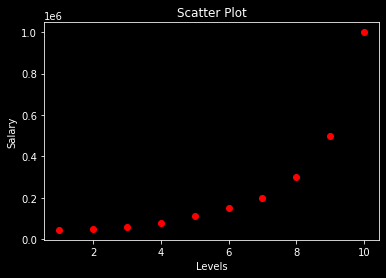

In [85]:
plt.scatter(X_l, y_p, color = 'red') # plotting the training set
plt.title('Scatter Plot') # adding a tittle to our plot
plt.xlabel('Levels') # adds a label to the x-axis
plt.ylabel('Salary') # adds a label to the y-axis
plt.show() # prints

The plot shows a non-linear relationship between the Levels and Salary.

Due to this, we cannot use the linear SVR to model this data. Therefore, to capture this relationship better, we will use the SVR with the kernel functions.

More about the kernels 
https://www.geeksforgeeks.org/major-kernel-functions-in-support-vector-machine-svm/ 


In [102]:
# Convert y_p from 1d to 2D
y_p = y_p.reshape(-1,1)

In [105]:
from sklearn.preprocessing import StandardScaler
StdS_X = StandardScaler()
StdS_y = StandardScaler()
X_l = StdS_X.fit_transform(X_l)
y_p = StdS_y.fit_transform(y_p) 

In [106]:
# Convert y_p from 2D to 1D
y_p = y_p.reshape(-1)

In [117]:
# import the model
from sklearn.svm import SVR
# create the model object
regressor = SVR(kernel = 'rbf')
# fit the model on the data
regressor.fit(X_l, y_p)

SVR()

Since the model is now ready, we can use it and make predictions as shown:

In [118]:
A=regressor.predict(StdS_X.transform([[6.5]]))
print(A)

[0.01158103]


In [119]:
A = A.reshape(-1,1)
print(A)

[[0.01158103]]


As we can see, the model prediction values are for the scaled study variable. But, the required value for the business is the output of the unscaled data. So, we need to get back to the real scale of the study variable.

In [120]:
# Taking the inverse of the scaled value
A_pred = StdS_y.inverse_transform(A)
print(A_pred)

[[252789.13921624]]


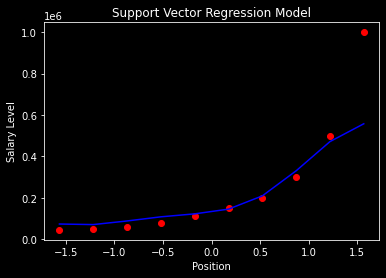

In [123]:
# inverse the transformation to go back to the initial scale
plt.scatter(StdS_X.inverse_transform(X_l), StdS_y.inverse_transform(y_p), color = 'red')
plt.plot(StdS_X.inverse_transform(X_l), StdS_y.inverse_transform(regressor.predict(X_l).reshape(-1,1)), color = 'blue')
# add the title to the plot
plt.title('Support Vector Regression Model')
# label x axis
plt.xlabel('Position')
# label y axis
plt.ylabel('Salary Level')
# print the plot
plt.show()